In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt

C:\Users\91867\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [47]:
ma_50_days = data.Close.rolling(50).mean()

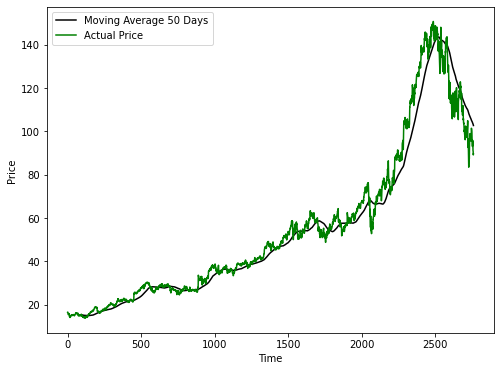

In [56]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'black', label='Moving Average 50 Days')
plt.plot(data.Close, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
ma_100_days = data.Close.rolling(100).mean()

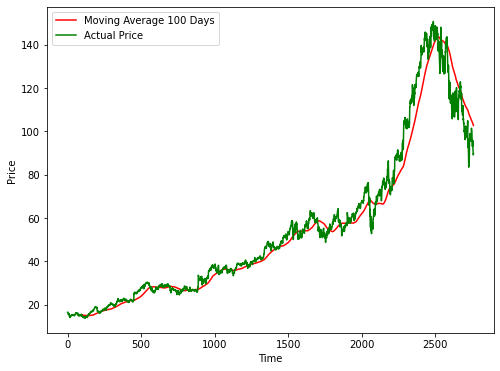

In [50]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='Moving Average 100 Days')
plt.plot(data.Close, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

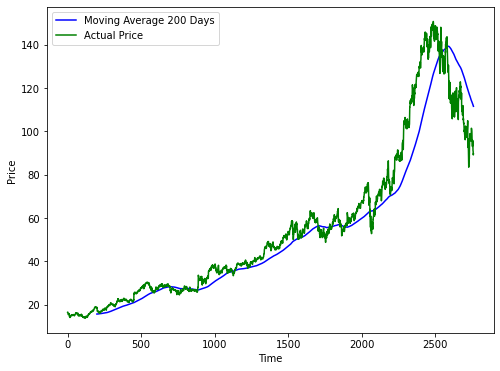

In [57]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days, 'b', label='Moving Average 200 Days')
plt.plot(data.Close, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

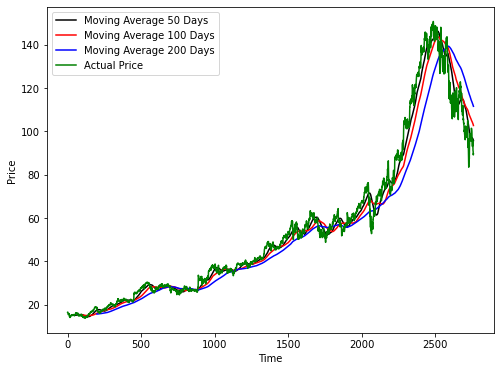

In [58]:
plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'black' ,label='Moving Average 50 Days')
plt.plot(ma_100_days, 'r' ,label='Moving Average 100 Days')
plt.plot(ma_200_days,'b' ,label='Moving Average 200 Days')
plt.plot(data.Close,'g' ,label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2208

In [13]:
data_test.shape[0]

553

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)


In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 [==============================] - 34s 303ms/step - loss: 0.0324
Epoch 2/50
66/66 [==============================] - 19s 287ms/step - loss: 0.0057
Epoch 3/50
66/66 [==============================] - 18s 278ms/step - loss: 0.0060
Epoch 4/50
66/66 [==============================] - 17s 259ms/step - loss: 0.0049
Epoch 5/50
66/66 [==============================] - 18s 267ms/step - loss: 0.0046
Epoch 6/50
66/66 [==============================] - 18s 267ms/step - loss: 0.0043
Epoch 7/50
66/66 [==============================] - 15s 224ms/step - loss: 0.0041
Epoch 8/50
66/66 [==============================] - 17s 255ms/step - loss: 0.0042
Epoch 9/50
66/66 [==============================] - 17s 251ms/step - loss: 0.0043
Epoch 10/50
66/66 [==============================] - 15s 229ms/step - loss: 0.0039
Epoch 11/50
66/66 [==============================] - 17s 253ms/step - loss: 0.0042
Epoch 12/50
66/66 [==============================] - 20s 297ms/step - loss: 0.0042
Epoch 13/50
6

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 48ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

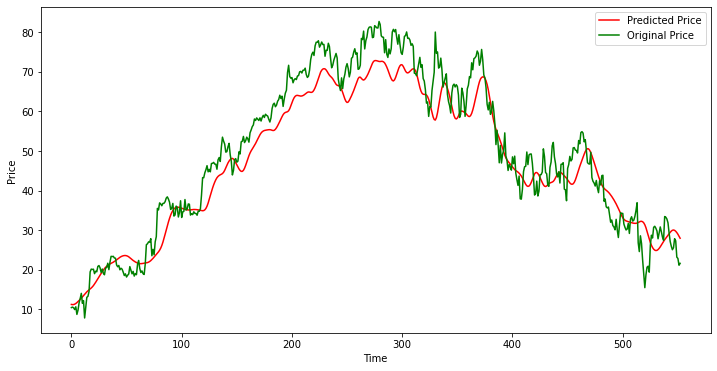

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
model.save('Stock Predictions Model.keras')